# Question 1


### A)

To derive an equation, begin with the mass balance equation:

$$ Input + Generation = Output + Accumulation $$ where:

$ Input = 10 L/s $, <br>
$ Generation = 0 $, <br>
$ Output = 2 L/s $, <br>
$ Accumulation = ? $ <br>

Solving for Accumulation we find: <br>

$$ Accumulation = 8 L/s = V'(t) $$ 

First order differential equation: $$ V'(t) = 8$$

Solving:

$$ V = \int_{0}^t 8 dt $$

$$ V = 8 *t + C $$ <br>

Since at $ t = 0$, $ V = 0$, therefore $C = 0 $. <br>

Max volume = 400 L, so we solve $ 400 L = 8 L/s * t $

$$ t = 50 s$$

The time to fill the tank to maximum capacity would be 50 seconds.




### B)

At t= 50.0 the volume is 400.0000000000035


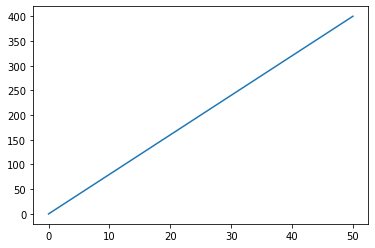

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Defining the function for the ODE derived in part A): dV/dt = 8.
def f(t,V):
    return 8
# Define Euler method

h = 0.1 # Define step size
t = np.arange(0, 50 + h, h) # Define range
V0 = 0 # Initial volume of water

V = np.zeros(len(t)) # Initialize volume vector
V[0] = V0 # Set initial volume in vector

for i in range(0,len(t)-1): # Iterate 
    V[i+1] = V[i] + h*f(t[i],V[i])

plt.plot(t,V) # Plot to see value

print('At t=',t[len(t)-1],"the volume is",V[len(t)-1])

### C)

At t= 50.0 the volume is 400.00000000000006


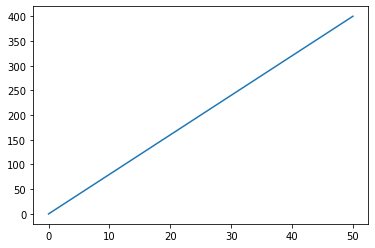

In [4]:
from scipy.integrate import solve_ivp

def fc(t,V):
    return 8

h = 0.1 # Define step size
t_span = np.array([0,50])
times = np.arange(0, 50 + h, h) # Define range using the stepsize

V0c = np.array([0])

sol = solve_ivp (fc, (0,50), V0c, t_eval=times, method='RK45')
t_s = sol.t
Vc = sol.y[0]

plt.plot(t_s,Vc)

print('At t=',t_s[len(t_s)-1],"the volume is",Vc[len(Vc)-1])

At t= 50.0 the volume is 400.00000000000006


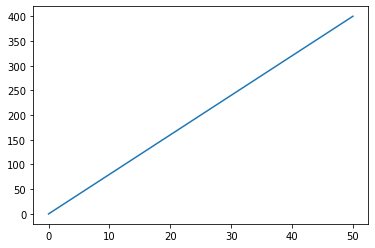

In [8]:
h2 = 0.001 # Define step size
t_span2 = np.array([0,50])
times2 = np.arange(0, 50 + h, h) # Define range using the stepsize

V0c = np.array([0])

sol2 = solve_ivp (fc, t_span, V0c, t_eval=times, method='RK45')
t_s2 = sol.t
Vc2 = sol.y[0]

plt.plot(t_s2,Vc2)

print('At t=',t_s2[len(t)-1],"the volume is",Vc2[len(Vc2)-1])

### D)

There are very little differences

# Question 2

### A)

Analyzing the reactions starting at K1, the ratio for K1/K1r is about 1, meaning that the rates of reaction are roughly equal between A and B. Seeing that K2 is also much greater than K1, all of the product from A/B will be turn to C very quickly. B is an intermediate and its levels will likely remain low. No amount of A will directly form C, but it is unclear if C will form A as K3 is not provided. This will affect how the system will behave at steady state. <br>

The system will take the form of the following equations: <br>

dA/dt = -k1[A] + k1r[B]-k3r[A]+k3[C] <br>
dB/dt = k1[A]-k1r[B]-k2[C] <br>
dC/dt = k2[B]+k3r[A]-k3[C] <br>

In [7]:
from scipy.integrate import odeint

                        
t2 = np.linspace(0, 10, 100)

def conc(t,c): # Define function for equation, take in c - vector of all concentrations 
    
    k1 = 33.7
    k1r = 28.7
    k2 = 400
    k3 = 150
    k3r = 0.02
    
    dAdt = -k1*c[0] + k1r*c[1]-k3r*c[0]+k3*c[2]
    dBdt = k1*c[0]-k1r*c[1]-k2*c[2]
    dCdt = k2*c[1]+k3r*c[0]-k3*[2]
    
    return [dAdt, dBdt, dCdt]
    return dAdt

c0 = [0,0,1]


sol2 = solve_ivp(conc,(0,10),c0)




<ipython-input-7-88dde86612f0>:14: RuntimeWarning: invalid value encountered in double_scalars
  dAdt = -k1*c[0] + k1r*c[1]-k3r*c[0]+k3*c[2]
